In [1]:
from tclust import TClust  # import our package
# Some other imports
import numpy as np
from numpy.matlib import repmat
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs

### Test with sklearn's blobs

(1500, 2)
Time spent on training = 2.71 s
[[  1   0 499   0]
 [  0   0   0 500]
 [  0 500   0   0]
 [  0   0   0   0]]
{0, 1, 2, 3}


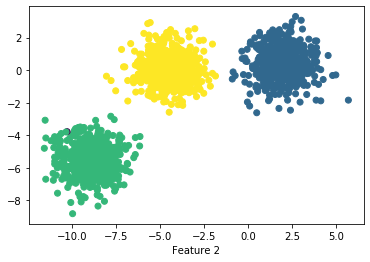

In [2]:
n_centers = 3
x, y = make_blobs(n_samples=1500, n_features=2, centers=n_centers, random_state=170)
print(x.shape)  # 1500 samples with 2 features each (just so we can plot them)

clustering = TClust(k=n_centers, alpha=0, verbose=False)
t0 = time.clock()
clustering.fit(x)
print('Time spent on training = %.2f s' % (time.clock() - t0))
#print("y.set", set(y), 'labels set', set(clustering.best_iter.labels_))
print(confusion_matrix(y, clustering.best_iter.labels_))
print(set(clustering.best_iter.labels_))
plt.scatter(x[:, 0], x[:, 1], c=clustering.best_iter.labels_)
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.show()

## Examples from the original tclust package

In [3]:
# Initialization
nsamp = 200
nfeat = 2
gauss = np.random.randn
u = gauss(nsamp * nfeat).reshape(nsamp, nfeat)  # standard normal distribution
v = np.cov(u.T)
eig_values, eig_vectors = np.linalg.eig(v)

Time spent on training = 30.17 s
{0, 1, 2, 3}


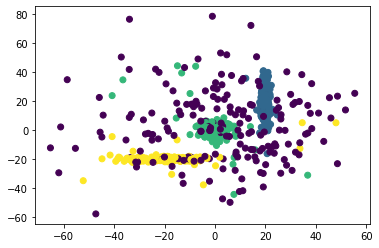

[[  0   0   0   0   0]
 [  2 198   0   0   0]
 [ 17   0   1 182   0]
 [ 12   0 188   0   0]
 [170   3  14  13   0]]


In [4]:
x1 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[1, 0], [0, 9]])).dot(eig_vectors) + \
     repmat(np.array([20, 20]).reshape(1, -1), nsamp, 1)
x2 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[9, 0], [0, 1]])).dot(eig_vectors) + \
     repmat(np.array([-20, -20]).reshape(1, -1), nsamp, 1)
x3 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[3, 0], [0, 3]])).dot(eig_vectors) + \
     repmat(np.array([0, 0]).reshape(1, -1), nsamp, 1)
x4 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[25, 0], [0, 25]])).dot(eig_vectors) + \
     repmat(np.array([2, 3]).reshape(1, -1), nsamp, 1)
x = np.concatenate((x1, x2, x3, x4), axis=0)  # shape=[800, 2]

clustering = TClust(k=3, alpha=0.25, niter=200, ksteps=40, equal_weights=False, restr_cov_value='deter',
                    maxfact_e=1e10, maxfact_d=10, m=1.1, zero_tol=1e-16, trace=0, opt='mixture', sol_ini=None,
                    tk=False, verbose=False)
t0 = time.clock()
clustering.fit(x)
print('Time spent on training = %.2f s' % (time.clock() - t0))
print(set(clustering.best_iter.labels_))
plt.scatter(x[:, 0], x[:, 1], c=clustering.best_iter.labels_)
plt.show()
label = [1] * nsamp + [2] * nsamp + [3] * nsamp + [4] * nsamp
print(confusion_matrix(label, clustering.best_iter.labels_))

Time spent on training = 64.84 s


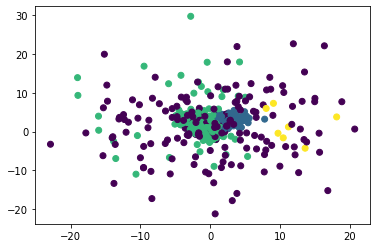

[[  0   0   0   0   0]
 [  7 180  13   0   0]
 [ 17   0 183   0   0]
 [ 31   0 169   0   0]
 [146   7  40   7   0]]


In [5]:
t0 = time.clock()
y1 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[1, 0], [0, 1]])).dot(eig_vectors) + \
     repmat(np.array([2.5, 3]).reshape(1, -1), nsamp, 1)
y2 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[1, 0], [0, 1]])).dot(eig_vectors) + \
     repmat(np.array([-2.5, 3]).reshape(1, -1), nsamp, 1)
y3 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[1, 0], [0, 1]])).dot(eig_vectors) + \
     repmat(np.array([0, 0]).reshape(1, -1), nsamp, 1)
y4 = gauss(nsamp * nfeat).reshape(nsamp, nfeat).dot(np.array([[8, 0], [0, 8]])).dot(eig_vectors) + \
     repmat(np.array([0, 2]).reshape(1, -1), nsamp, 1)
y = np.concatenate((y1, y2, y3, y4), axis=0)  # shape=[800, 2]

clustering = TClust(k=3, alpha=0.25, niter=200, ksteps=40, equal_weights=False, maxfact_d=10, m=1.1, 
                    restr_cov_value='deter', maxfact_e=1, zero_tol=1e-16, trace=0, opt='fuzzy', sol_ini=None, 
                    verbose=False)
t0 = time.clock()
clustering.fit(y)
print('Time spent on training = %.2f s' % (time.clock() - t0))
plt.scatter(y[:, 0], y[:, 1], c=clustering.best_iter.labels_)
plt.show()
label = [1] * nsamp + [2] * nsamp + [3] * nsamp + [4] * nsamp
print(confusion_matrix(label, clustering.best_iter.labels_))